In [1]:
# Training attributes - Gabbar

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

In [5]:
non_training_attributes = ['changeset_id', 'changeset_harmful']

In [6]:
path = '../downloads/dataset/'

In [7]:
training = pd.read_csv(path + 'training.csv')
validation = pd.read_csv(path + 'validation.csv')

In [8]:
# Drop all duplicate attributes.
print('Shape before dropping NaN: {}'.format(training.shape))
training = training.dropna()
print('Shape after dropping NaN: {}'.format(training.shape))

Shape before dropping NaN: (7114, 115)
Shape after dropping NaN: (7113, 115)


In [9]:
scores = []
index = []

# for i in range(len(training_attributes)):
for i in range(1, len(training.columns.drop(non_training_attributes))):
    training_attributes = training.columns.drop(non_training_attributes).values[:i]
    
    X = training[training_attributes]
    y = training['changeset_harmful']
    
    scaler = StandardScaler().fit(X)
    model = GradientBoostingClassifier(n_estimators=700, max_features='log2', learning_rate=0.5, random_state=5, max_depth=7)
    
    X_scaled = scaler.transform(X)
    y_model = model.fit(X_scaled, y)
    
    vX = validation[training_attributes]
    vy = validation['changeset_harmful']
    
    # Performance on validation dataset.
    vX_scaled = scaler.transform(vX)
    vy_model = model.predict(vX_scaled)
    
    score = [metric(vy, vy_model) for metric in [metrics.precision_score, metrics.recall_score, metrics.f1_score, metrics.roc_auc_score]]
    index.append(training_attributes[-1])
    scores.append(score)

In [10]:
scores = pd.DataFrame(scores, columns=['precision_score', 'recall_score', 'f1_score', 'roc_auc_score'], index=index)
print(scores.shape)
scores.head()

(112, 4)


,precision_score,recall_score,f1_score,roc_auc_score
changeset_features_created,0.0,0.0,0.0,0.5
changeset_features_modified,0.0,0.0,0.0,0.5
changeset_features_deleted,0.0,0.0,0.0,0.5
changeset_has_imagery_used,0.0,0.0,0.0,0.5
changeset_has_source,0.0,0.0,0.0,0.5


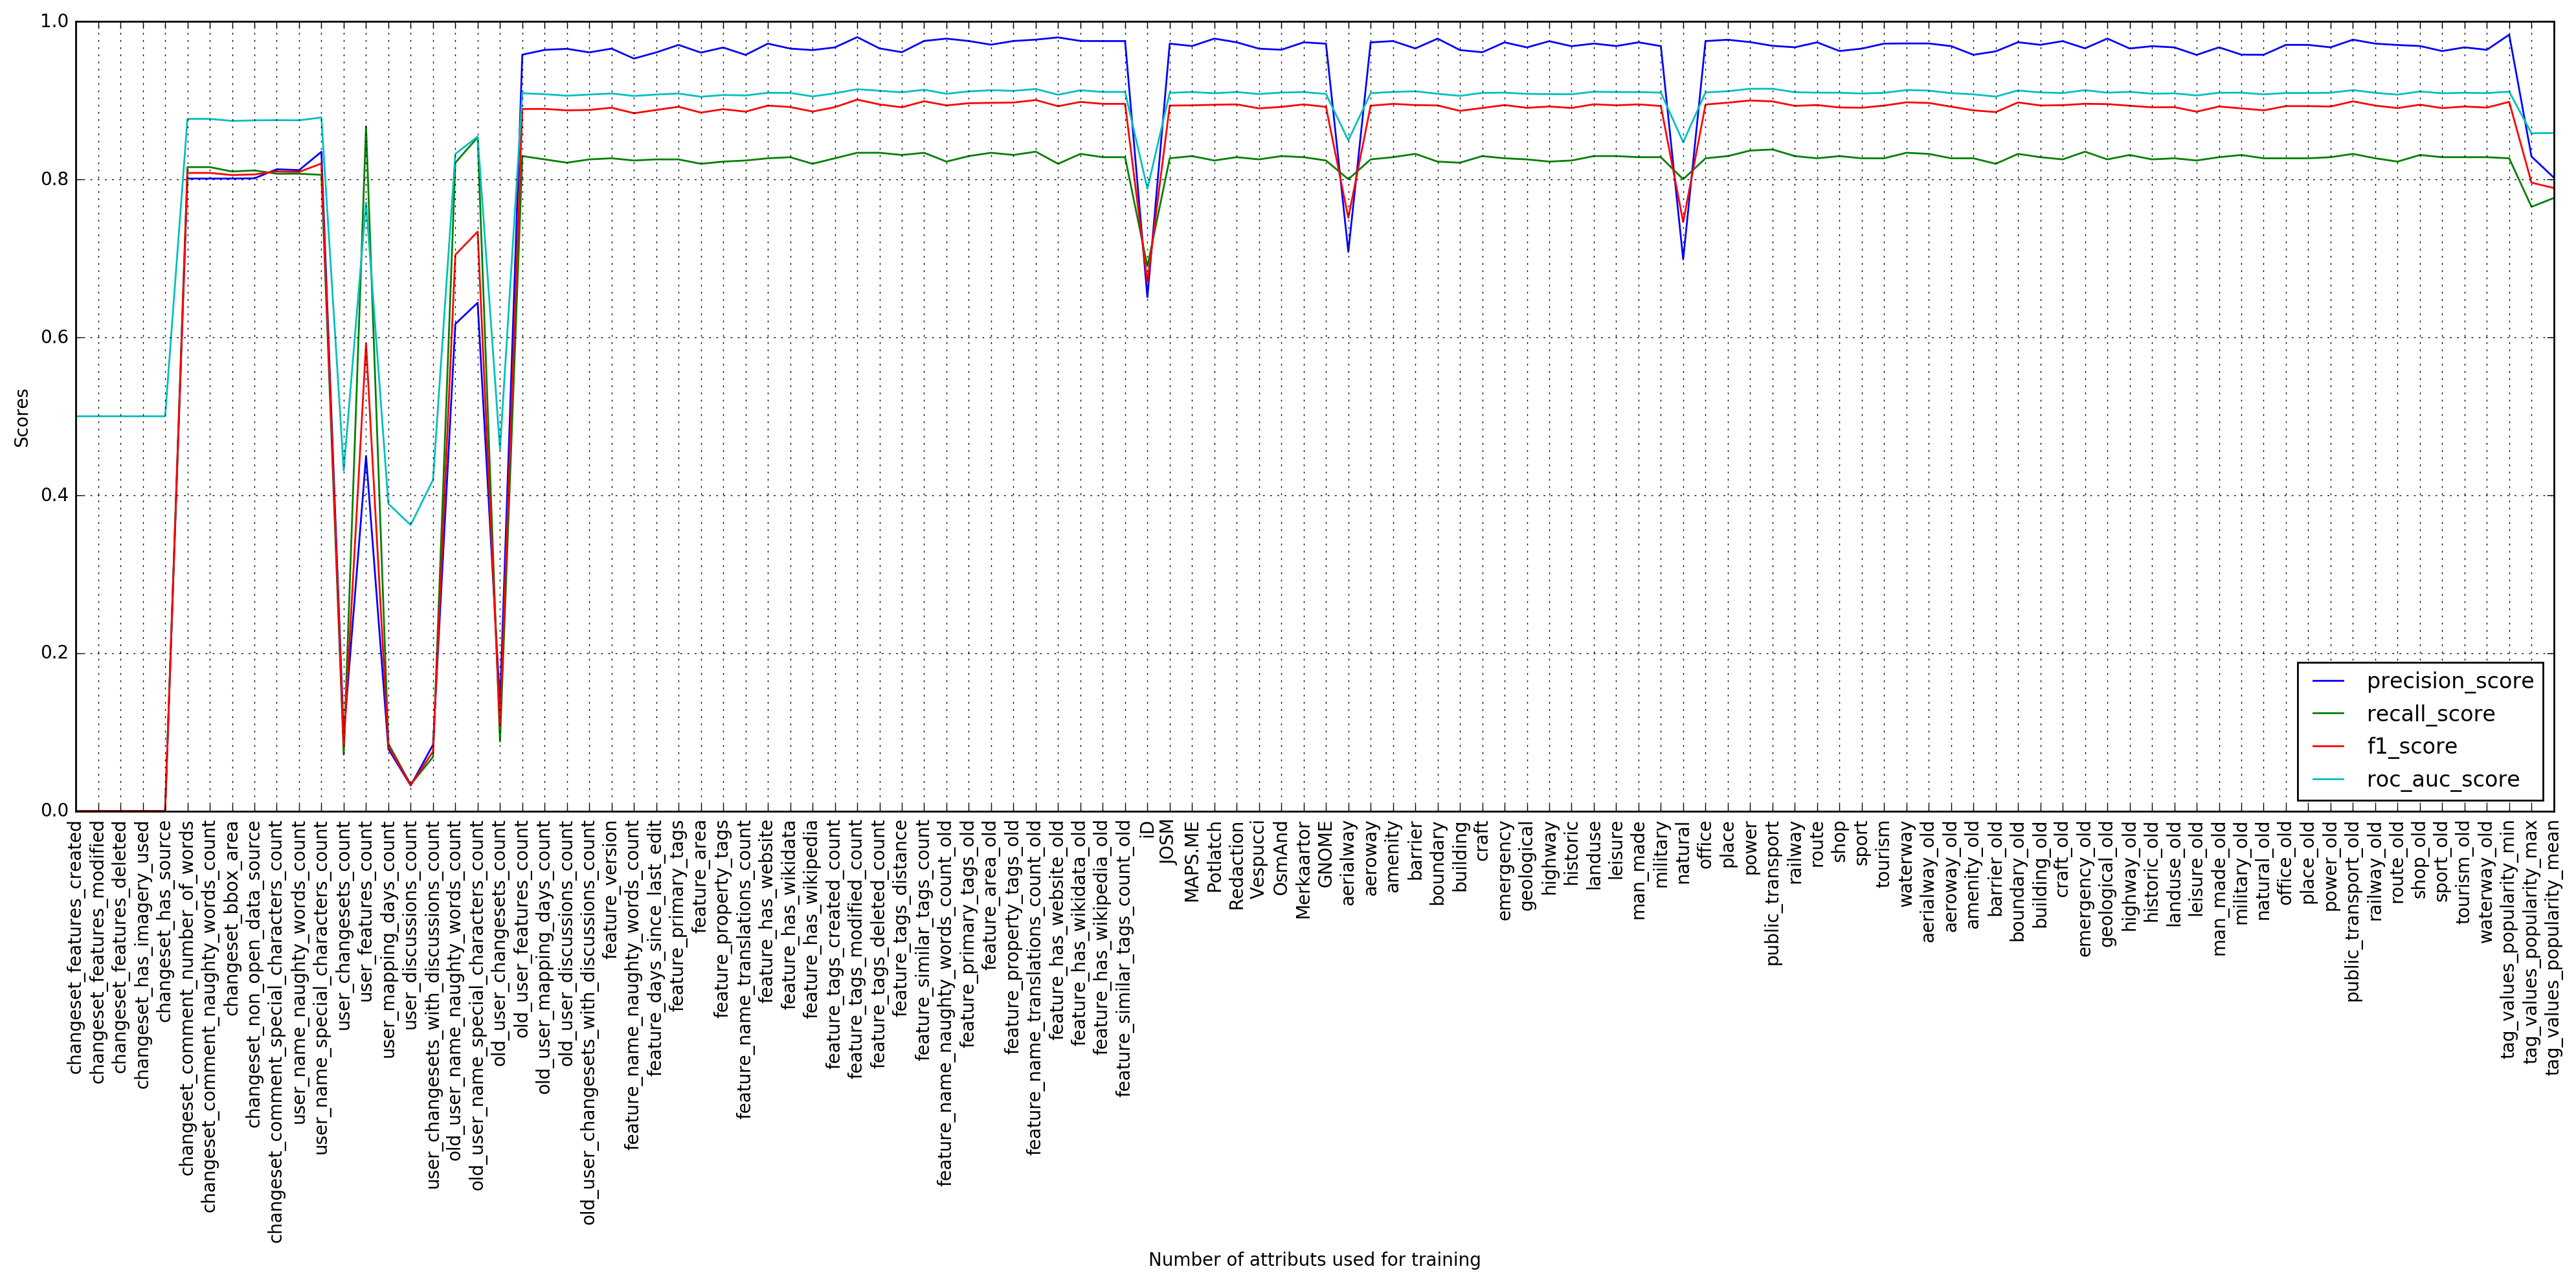

In [11]:
axes = scores.plot(figsize=(20, 10))

axes.set_xlabel('Number of attributs used for training')
axes.set_ylabel('Scores')
axes.set_ylim(0, 1)
axes.set_xticks(range(len(index)))
axes.set_xticklabels(labels=index, rotation=90)

plt.grid()
plt.tight_layout()

In [12]:
importances = pd.DataFrame(
    list(zip(X.columns, model.feature_importances_)),
    columns=['feature', 'importance']
)
importances = importances.sort(columns='importance', ascending=False)
importances.head()

,feature,importance
5,changeset_comment_number_of_words,0.047897
13,user_features_count,0.047708
37,feature_tags_distance,0.046980
12,user_changesets_count,0.044268
14,user_mapping_days_count,0.041362


In [13]:
scores = []
index = []

# for i in range(len(training_attributes)):
for i in range(1, len(importances.feature.values)):
    training_attributes = importances.feature.values[:i]
    
    X = training[training_attributes]
    y = training['changeset_harmful']
    
    scaler = StandardScaler().fit(X)
    model = GradientBoostingClassifier(n_estimators=700, max_features='log2', learning_rate=0.5, random_state=5, max_depth=7)
    
    X_scaled = scaler.transform(X)
    y_model = model.fit(X_scaled, y)
    
    vX = validation[training_attributes]
    vy = validation['changeset_harmful']
    
    # Performance on validation dataset.
    vX_scaled = scaler.transform(vX)
    vy_model = model.predict(vX_scaled)
    
    score = [metric(vy, vy_model) for metric in [metrics.precision_score, metrics.recall_score, metrics.f1_score, metrics.roc_auc_score]]
    index.append(training_attributes[-1])
    scores.append(score)

In [14]:
scores = pd.DataFrame(scores, columns=['precision_score', 'recall_score', 'f1_score', 'roc_auc_score'], index=index)
print(scores.shape)
scores.head()

(111, 4)


,precision_score,recall_score,f1_score,roc_auc_score
changeset_comment_number_of_words,0.767927,0.822626,0.794336,0.873165
user_features_count,0.924290,0.818436,0.868148,0.898931
feature_tags_distance,0.475449,0.554469,0.511928,0.683364
user_changesets_count,0.939005,0.817039,0.873786,0.900376
user_mapping_days_count,0.062077,0.076816,0.068664,0.360311


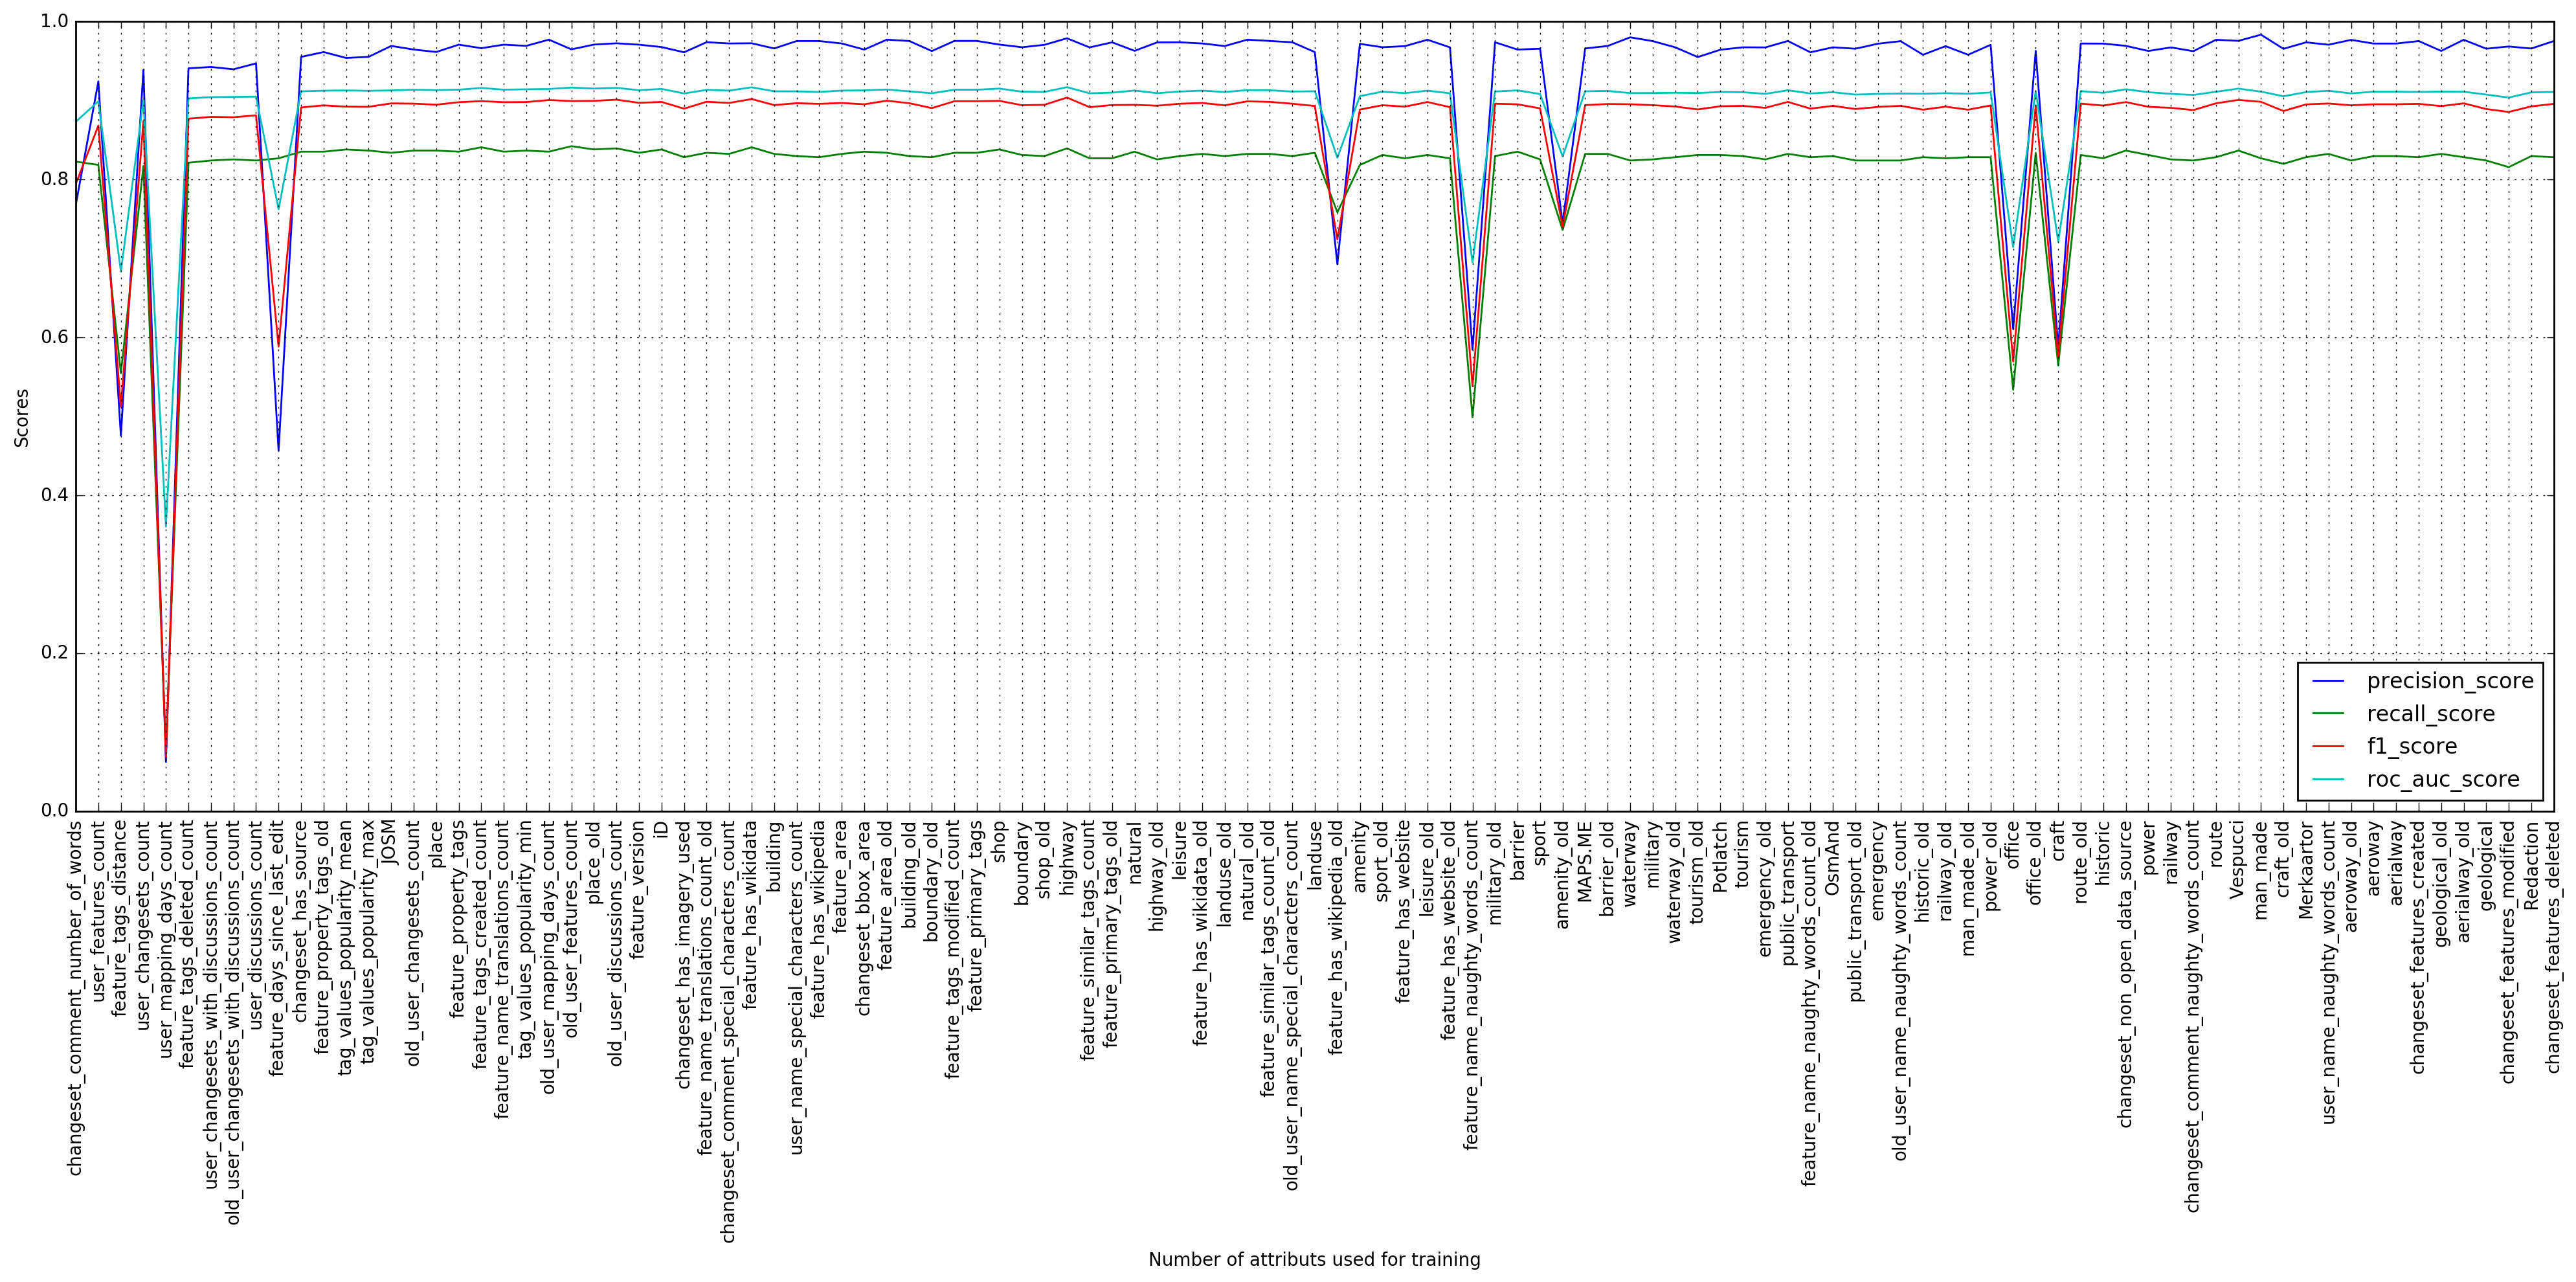

In [15]:
axes = scores.plot(figsize=(20, 10))

axes.set_xlabel('Number of attributs used for training')
axes.set_ylabel('Scores')
axes.set_ylim(0, 1)
axes.set_xticks(range(len(index)))
axes.set_xticklabels(labels=index, rotation=90)

plt.grid()
plt.tight_layout()